## Lab 4
## Zohair Mubasheer Ahmed 8997082

In [4]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()


- Multivariate Linear Regression & Model Estimation

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


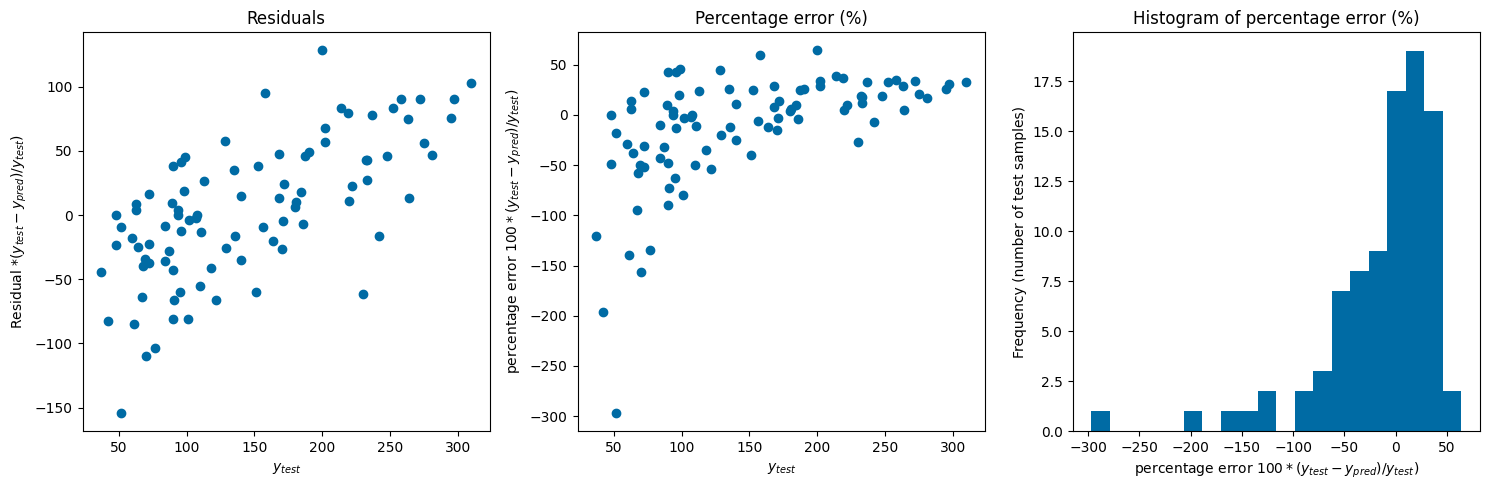

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)
model_estimation(linear_model, y_train, y_test, y_pred_train, y_pred_test)

- Multivariate Polynomial Regression & Model Estimation

Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

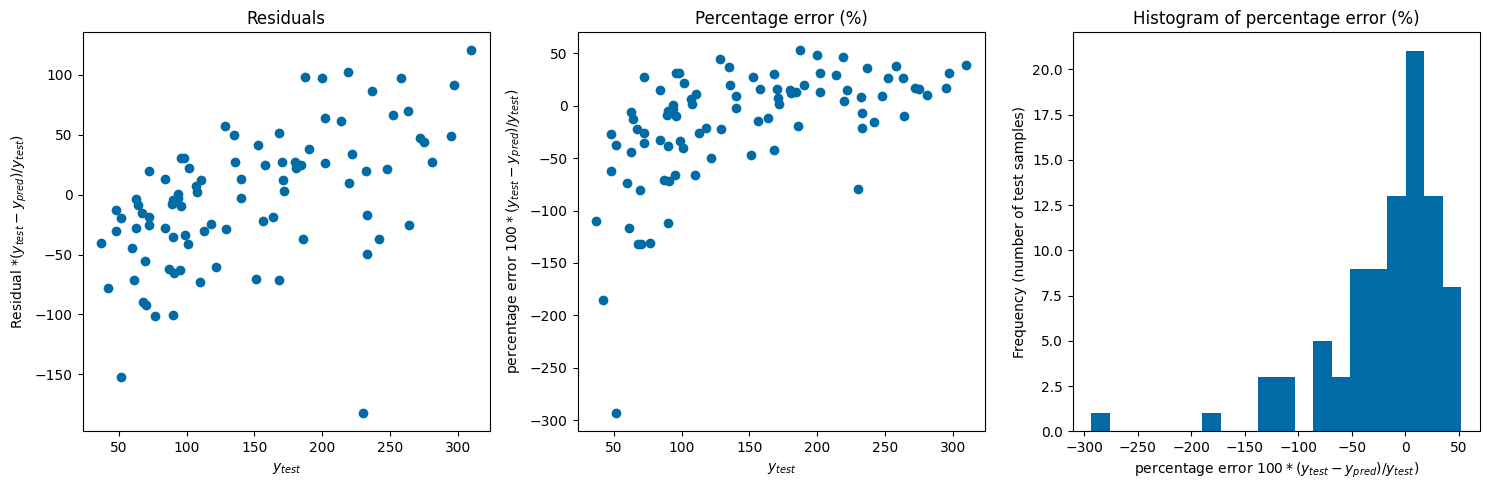

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.fit_transform(X_test)

ploy_regression_model = LinearRegression()
ploy_regression_model.fit(X_train_poly,y_train)

y_pred_poly_train = ploy_regression_model.predict(X_train_poly)
y_pred_poly_test = ploy_regression_model.predict(X_test_poly)

model_estimation(ploy_regression_model, y_train, y_test, y_pred_poly_train, y_pred_poly_test)

- Questions

1. How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out().


In [8]:
poly_model.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

Out of the 65 features produced by the polynomial transformation, a total of 10 features align with the initial features, which are age, sex, bmi, bp, s1, s2, s3, s4, s5, and s6. The aforementioned characteristics denote the independent variables and their respective impacts on the reliant variable.

A supplementary set of ten features comprises the second-order polynomial terms of the initial features, including but not limited to age^2, sex^2, bmi^2, bp^2, and others as well. The aforementioned characteristics capture the exponential associations among the primary variables and enable the model to accommodate non-linear implications.

The 45 leftover features comprise of parameters for interaction that denote the pairwise relationships among the independent variables. Instances of variables such as agebmi, sexbp, s1*s2, among others, are commonly used in research studies.

2. Which model would you choose for deployment, and why?

The performance of the linear regression model (linear_model) and the polynomial regression model (poly_model) can be compared based on the provided mean absolute error (MAE), mean square error (MSE), root mean square error (RMSE), and mean absolute percentage error (MAPE) values. Both Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) are metrics used to evaluate the accuracy of a model. 

A lower value of either MAE or MAPE indicates a higher level of accuracy for the model. Upon comparing the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) values of the two models, it is evident that the linear regression model (linear_model) exhibits marginally lower values in contrast to the polynomial regression model (poly_model). This suggests that the linear regression model exhibits marginally superior precision in forecasting the dependent variable. With respect to Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), these evaluation metrics also quantify the mean of the squared discrepancies between the predicted and observed values. Once more, lower values are indicative of superior performance. 

The findings indicate that the linear regression model exhibits a marginally reduced mean squared error (MSE) and root mean squared error (RMSE) in contrast to the polynomial regression model. Based on the aforementioned metrics and the observation that the linear regression model exhibits marginally superior performance across various evaluation metrics, it could be argued that the linear_model may be deemed more suitable for deployment. The model offers a more straightforward approach with marginally superior precision and reduced error metrics. Nevertheless, it is crucial to acknowledge that the disparity in efficacy across both of these models is comparatively insignificant.

3. What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

The residual graph depicts the disparity between the observed and estimated values. In the context of linear regression, an uncorrelated deviation from the zero line is indicative of a satisfactory fit, whereas discernible patterns imply that polynomial regression could be better suited to capturing non-linear associations. The scatter plot depicting percentage error displays the correlation between factual values and the corresponding percentage errors.

In the context of linear regression, the presence of random scatter around the zero point is indicative of precise predictions. Conversely, the identification of discernible patterns suggests the possibility of enhancing predictive accuracy through the application of polynomial regression. The histogram of percentage errors displays the frequency distribution of percentage errors. 

A histogram that is symmetric and follows a normal distribution with a central tendency at zero is indicative of a suitable fit for linear regression. Conversely, distributions that exhibit deviations or skewness may imply the presence of bias when utilizing polynomial regression.